### Logistic Regression with Imbalanced Dataset

In [1]:
# importing required libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating the imbalanced dataset

from sklearn.datasets import make_classification
X,y=make_classification(n_classes=2, n_samples=1000, n_features=10, n_clusters_per_class=1, weights=[0.01, 0.99], random_state=42)

In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.360072,-1.607661,-0.835143,-0.319848,1.703877,-1.229856,0.151260,0.151758,0.184741,2.089539
1,-0.005795,1.671348,-0.176134,-0.893746,1.616256,-1.371212,-0.000382,-0.387965,-0.901376,-2.899514
2,2.023848,0.082773,1.959837,-0.482314,0.145563,1.068923,0.838405,1.098983,0.036783,0.450613
3,0.370982,-0.985804,0.692856,-0.179093,1.718605,-1.235894,0.155796,0.395820,-0.284155,0.734638
4,0.872125,-0.550587,1.302590,-1.137033,1.115297,-0.430140,0.362603,-0.821815,0.509689,0.137662
...,...,...,...,...,...,...,...,...,...,...
995,-1.119733,-2.850030,-1.206022,-1.000629,2.573573,-2.837510,-0.460550,-0.855095,0.544582,-0.885971
996,1.307796,0.295280,-2.371659,0.994447,0.641896,0.227111,0.542455,0.646006,-0.776499,2.042070
997,-0.536932,0.210601,-0.080917,0.026205,2.196872,-2.175429,-0.219640,-0.303564,-0.488476,-3.170426
998,1.602527,0.603248,0.228996,0.441307,0.681953,0.366818,0.664575,-0.733156,0.298158,-1.857901


In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
# counting the number of y-values

from collections import Counter
Counter(y)


Counter({np.int64(1): 986, np.int64(0): 14})

<Axes: xlabel='0', ylabel='1'>

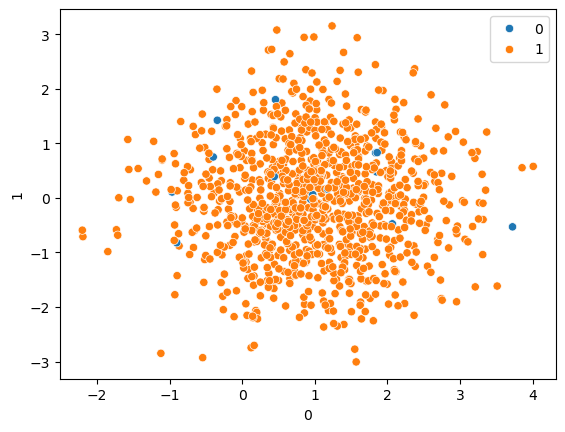

In [19]:
# visulaizing the weights of '1' and '0' in pur data

sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [20]:
# splitting the dataset into train, test, split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [21]:
# Fitting a Logistic Regression to our data and Hyper-Parameter Tuning our Model

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [22]:
params=dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy')

In [28]:
grid.fit(X_train, y_train)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: T

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 1},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [30]:
grid.best_score_

np.float64(0.9933333333333334)

In [31]:
y_pred=grid.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
Counter(y_pred)

Counter({np.int64(1): 248, np.int64(0): 2})

In [35]:
# evaluating our GridCV model based on performance metrics

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test, y_pred)
print(report)

[[  2   3]
 [  0 245]]
0.988
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.99      1.00      0.99       245

    accuracy                           0.99       250
   macro avg       0.99      0.70      0.78       250
weighted avg       0.99      0.99      0.99       250

